<div style="font-size:2em; font-weight:bold; text-align:center">RL For Tempo Detection</div>
<br>
<div style="text-align:center">This notebook is for testing a RL model to detect tempo (recordings and real-time) from the input audio signal.</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import os

In [4]:
#  choose audio file
name = 'meditation_piano_acc'
filename = f'{name}.mp3'

In [5]:
# load audio file
audio_path = f'../audio_in/{filename}'
if not os.path.exists(audio_path):
	raise FileNotFoundError(f'Audio file not found: {audio_path}')

signal: np.ndarray
signal, sr = librosa.load(audio_path, sr=None)  
signal -= np.mean(signal) # remove DC offset
t = np.arange(len(signal))/sr # get time vector

print(f'Sample rate: {sr}')
print(f'Signal length: {len(signal)}')
print(f'Signal duration: {len(signal)/sr:.3f} s')

Sample rate: 44100
Signal length: 13454336
Signal duration: 305.087 s


Text(0, 0.5, 'Amplitude')

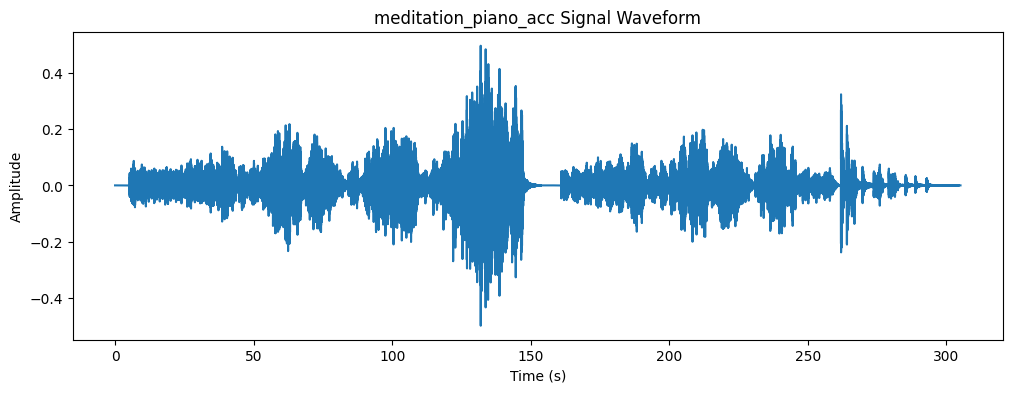

In [6]:
# plot signal waveform
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title(f'{name} Signal Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

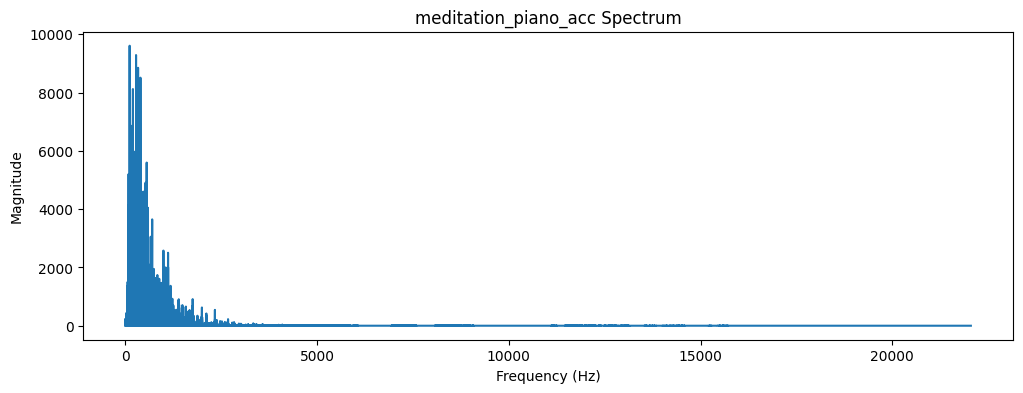

In [7]:
# plot signal spectrum
def plot_spectrum(signal, sr, name, filtered=False):
    N = len(signal)
    freqs = np.fft.rfftfreq(N, d=1/sr)
    fft_vals = np.fft.rfft(signal)
    magnitude = np.abs(fft_vals)

    plt.figure(figsize=(12, 4))
    plt.plot(freqs, magnitude)
    if filtered: plt.title(f'{name} Filtered Spectrum')
    else: plt.title(f'{name} Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

plot_spectrum(signal, sr, name)